10 SEP 2024

**นำเข้าภาพและใส่ Log ลงไป จะทำให้ภาพซีดลง**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import matplotlib.pyplot as plt
from PIL import Image

pdf_src_path = '/content/drive/MyDrive/Image Processing/'
image = Image.open(pdf_src_path + '20240614_144702.jpg')

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

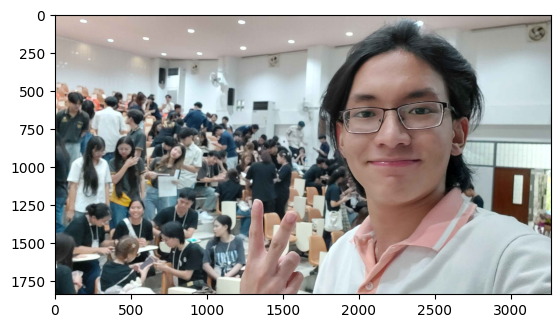

In [31]:
img_rgb = image.convert('RGB')
#img_rgb.save(pdf_src_path + 'Log_image.png')
plt.imshow(img_rgb)
plt.show()

**Apply Log**

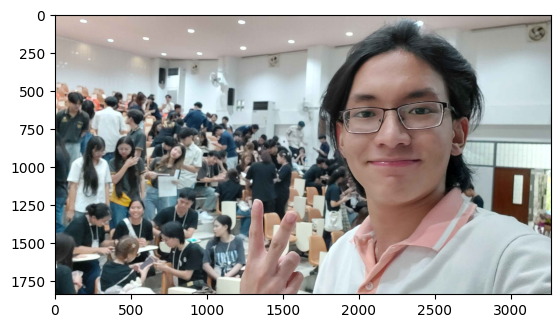

45.98590442833571
1.0 256.0
0.0 255.0


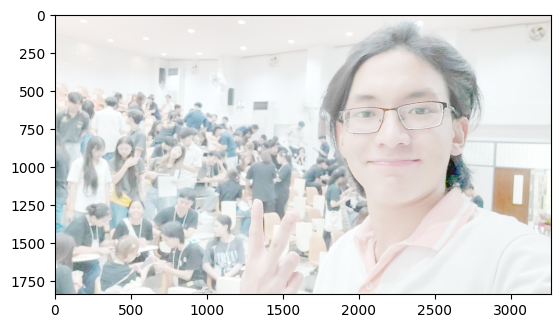

In [33]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

pdf_src_path = '/content/drive/MyDrive/Image Processing/'
image = Image.open(pdf_src_path + '20240614_144702.jpg')

img_rgb = image.convert('RGB')
#img_rgb.save(pdf_src_path + 'Log_image.png')
plt.imshow(img_rgb)
plt.show()

# Convert the image to a NumPy array
img_array = np.array(img_rgb)

# Calculate c using the max value from the NumPy array
c = 255 / np.log(1 + img_array.max())
print(c)

img_tmp = 1. + img_array
print(img_tmp.min(), img_tmp.max())

img_log = c * np.log(img_tmp)
print(img_log.min(), img_log.max())

img_log = np.array(img_log, dtype=np.uint8)

plt.imshow(img_log)
plt.show()

img_log_bgr = cv2.cvtColor(img_log, cv2.COLOR_RGB2BGR)

Save และอ่านรูปภาพที่ผ่านการ Apply Log

In [40]:
# Save Log Image
cv2.imwrite('img_log.jpg', img_log_bgr)

True

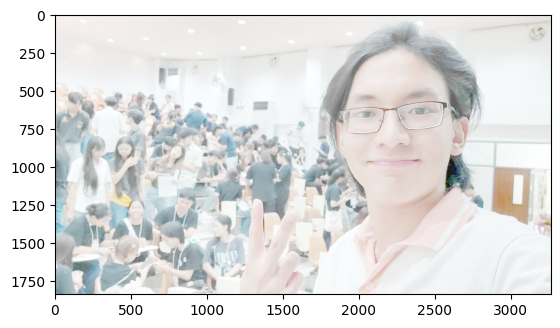

In [43]:
filename = 'img_log' # 'House' (too dark), 'Sky_Gamma0.1' (too light)
img = cv2.imread(filename+'.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

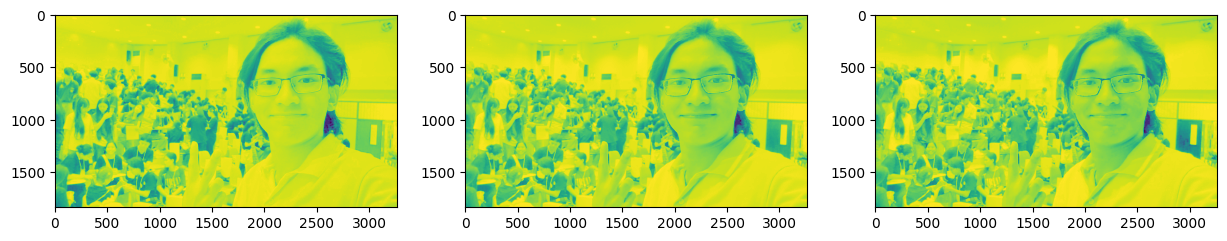

In [44]:
# Separate 3 channels.
img_r = img_rgb[:, :, 0]
img_g = img_rgb[:, :, 1]
img_b = img_rgb[:, :, 2]

fig = plt.figure(figsize=(15, 10)) # (w, h) in inches.
plt.subplot(1, 3, 1) # rows, cols, index (starting from 1).
plt.imshow(img_r)
plt.subplot(1, 3, 2)
plt.imshow(img_g)
plt.subplot(1, 3, 3)
plt.imshow(img_b)
plt.show()

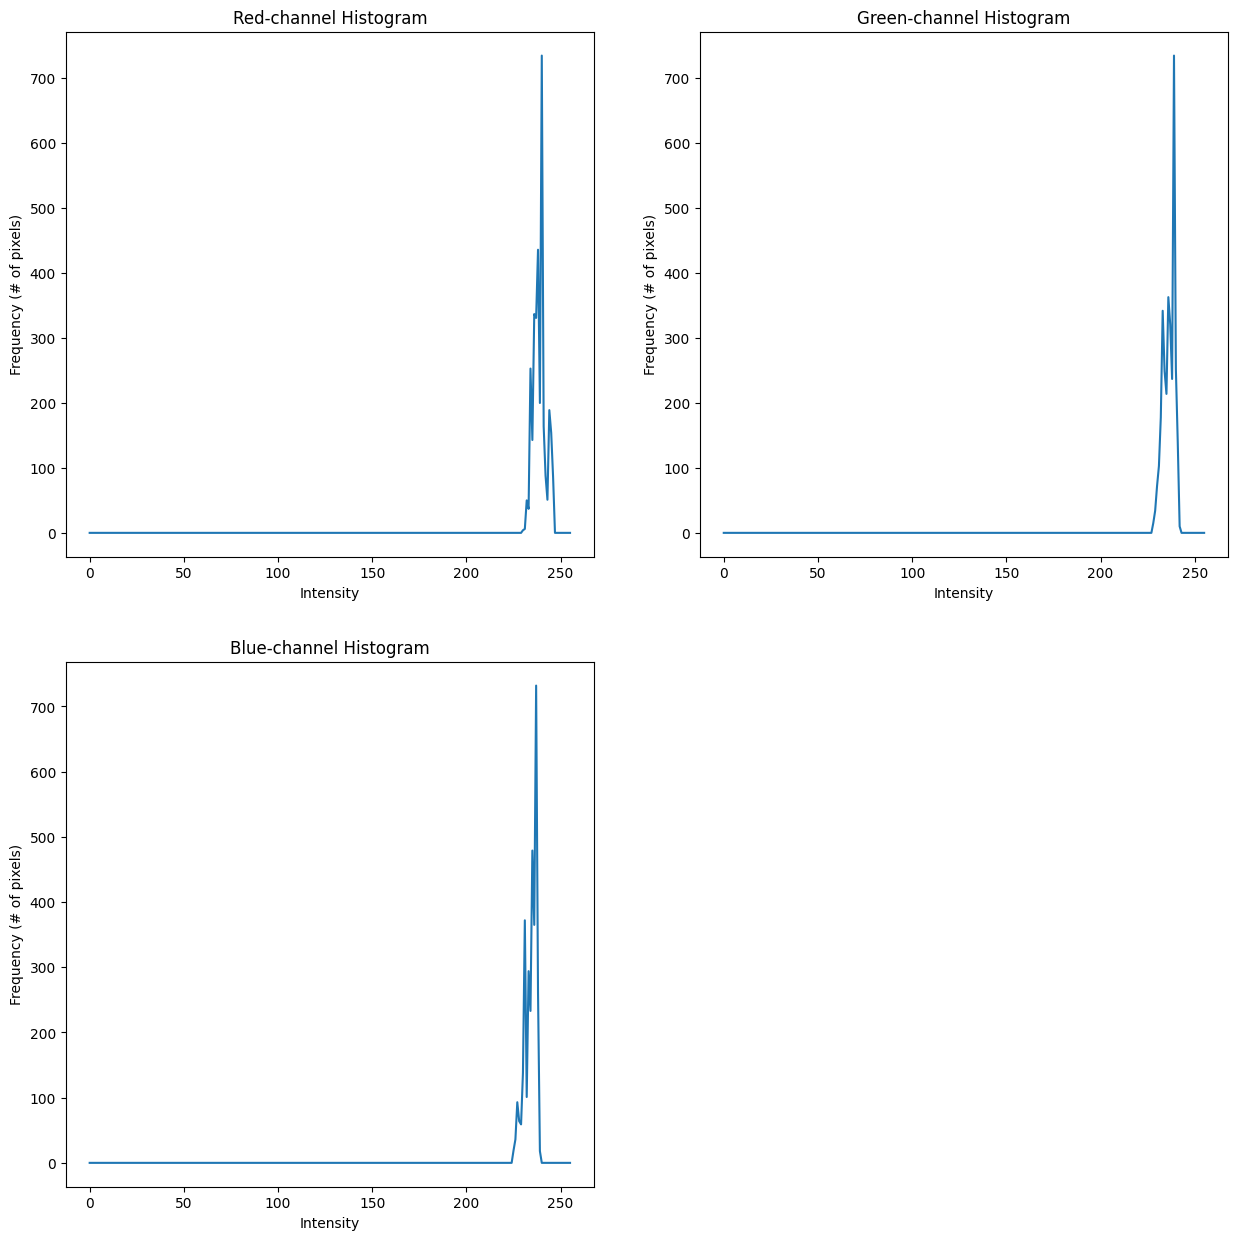

In [45]:
hist_r = cv2.calcHist(img_r, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_g = cv2.calcHist(img_g, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_b = cv2.calcHist(img_b, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
fig = plt.figure(figsize=(15, 15)) # (w, h) in inches.
plt.subplot(2, 2, 1) # rows, cols, index (starting from 1).
plt.title('Red-channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency (# of pixels)')
plt.plot(hist_r)
plt.subplot(2, 2, 2)
plt.title('Green-channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency (# of pixels)')
plt.plot(hist_g)
plt.subplot(2, 2, 3)
plt.title('Blue-channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency (# of pixels)')
plt.plot(hist_b)
plt.show()

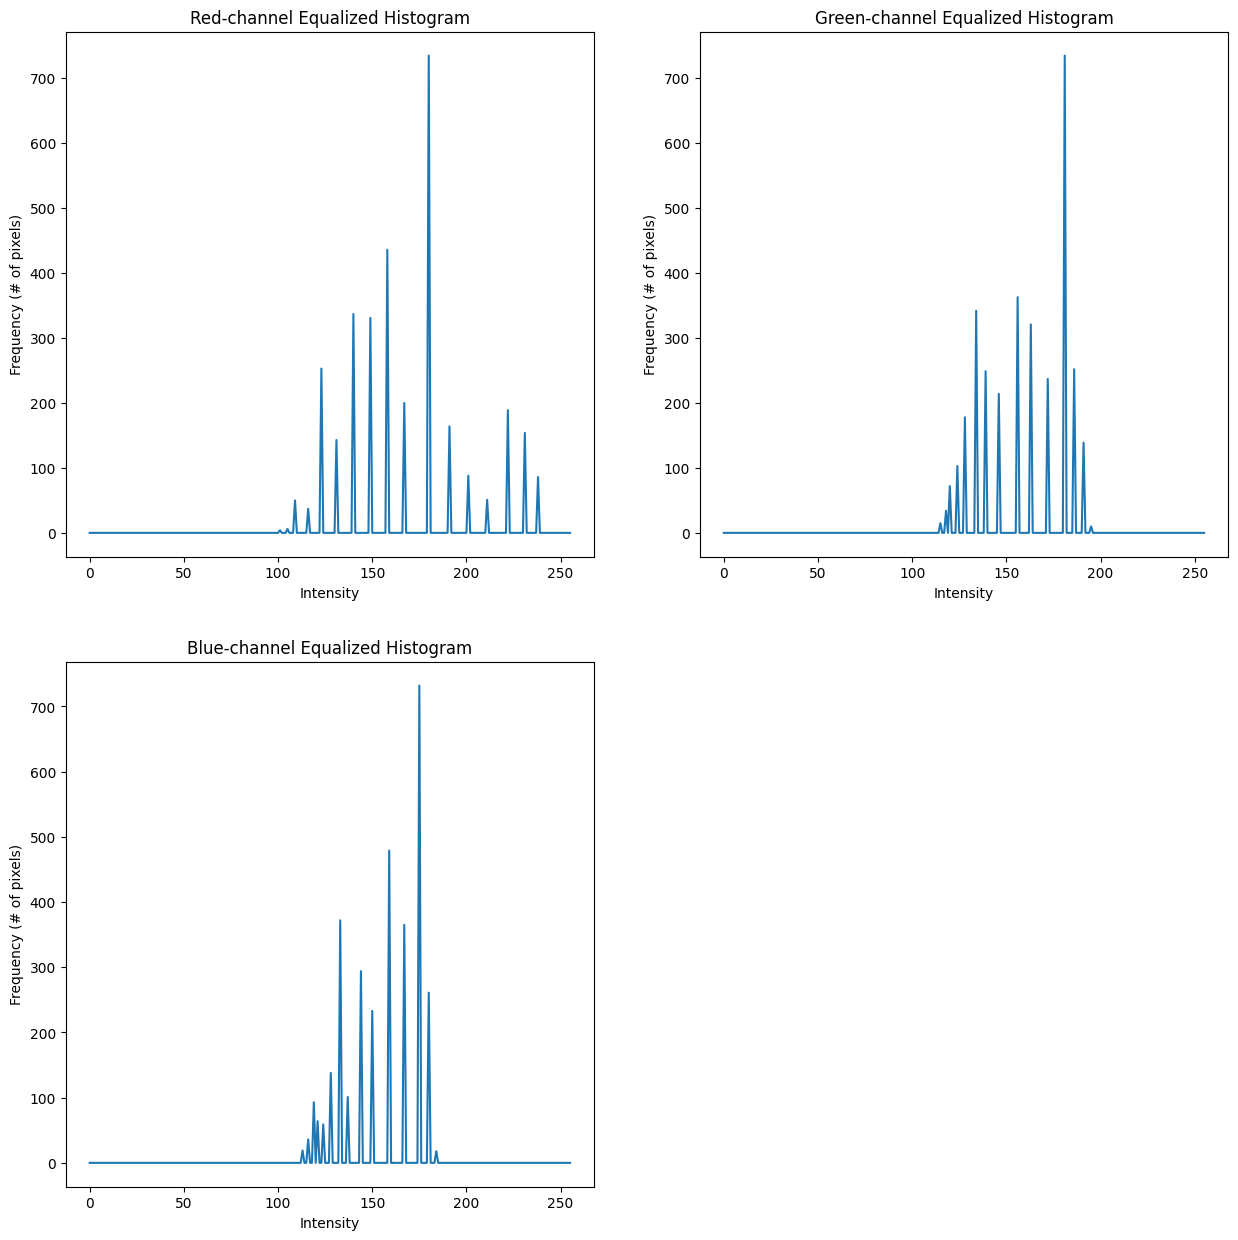

In [46]:
# Equalize histogram.
img_r_eqHist = cv2.equalizeHist(src=img_r)
img_g_eqHist = cv2.equalizeHist(src=img_g)
img_b_eqHist = cv2.equalizeHist(src=img_b)

hist_eq_r = cv2.calcHist(img_r_eqHist, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_eq_g = cv2.calcHist(img_g_eqHist, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_eq_b = cv2.calcHist(img_b_eqHist, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
fig = plt.figure(figsize=(15, 15)) # (w, h) in inches.
plt.subplot(2, 2, 1) # rows, cols, index (starting from 1).
plt.title('Red-channel Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency (# of pixels)')
plt.plot(hist_eq_r)
plt.subplot(2, 2, 2)
plt.title('Green-channel Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency (# of pixels)')
plt.plot(hist_eq_g)
plt.subplot(2, 2, 3)
plt.title('Blue-channel Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency (# of pixels)')
plt.plot(hist_eq_b)
plt.show()

(1836, 3264)


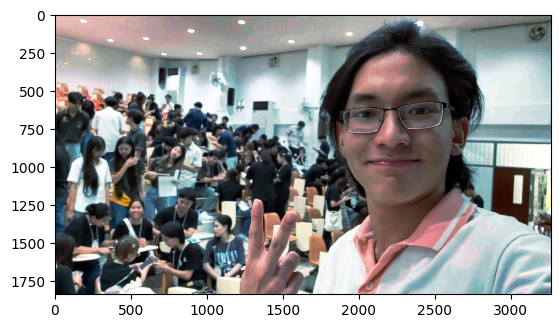

True

In [47]:
# Concatenate back to RGB-color image.
print(np.shape(img_r_eqHist))
img_eqHist = cv2.merge((img_r_eqHist, img_g_eqHist, img_b_eqHist))
plt.imshow(img_eqHist)
plt.show()

img_eqHist_bgr = cv2.cvtColor(img_eqHist, cv2.COLOR_RGB2BGR)
cv2.imwrite(filename+'_eqHist.jpg', img_eqHist_bgr)